# Проанализируем получившийся датасет с резюме

In [1]:
# Скачиваем датасет
import gdown
url = 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1LhHBKx2wzJrT7XXVbE6Yk9AHqtcCo2w8'
gdown.download(url, '/content/')

Downloading...
From: https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1LhHBKx2wzJrT7XXVbE6Yk9AHqtcCo2w8
To: /content/df_with_labels.zip
100%|██████████| 6.43M/6.43M [00:00<00:00, 54.4MB/s]


'/content/df_with_labels.zip'

In [2]:
import os
os.mkdir("data")

In [3]:
!unzip -q /content/df_with_labels.zip -d data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Загружаем датасет и отображаем последние 5 строк из него:

In [5]:
df = pd.read_csv('/content/data/df_with_labels(2).csv')
df.tail()

,Unnamed: 0,Category,Resume,Label
3426,3426,Web Designing,contract business analyst data scientist contr...,1
3427,3427,Database Analyst,nosql database analyst nosql span class hl ...,0
3428,3428,Full Stack Developer,full stack java developer full stack span cla...,0
3429,3429,Systems Analyst,systems administrator systems administrator sy...,0
3430,3430,Systems Analyst,contractor contractor contractor the hartfor...,3


## Исследуем данные

- Проверим наличие в наборе данных нулевых значений

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Category,0
Resume,0
Label,0


In [7]:
print(df.shape)
print(df.info())

(3431, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3431 non-null   int64 
 1   Category    3431 non-null   object
 2   Resume      3431 non-null   object
 3   Label       3431 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 107.3+ KB
None


- Посмотрим, какие есть уникальные категории

In [8]:
unique_categories = df['Category'].unique()
print(unique_categories)

['Data Science' 'Web Designing' 'Java Developer' 'Business Analyst'
 'SAP Developer' 'Automation Testing' 'Python Developer' 'DevOps Engineer'
 'Network Security Engineer' 'DotNet Developer' 'Testing'
 'Full Stack Developer' 'UI/UX designer' 'Systems Analyst'
 'IT Support Engineer' 'Database Analyst' 'BackEnd Developer'
 'IT Service Manager']


- Посмотрим на столбец Category.

In [9]:
df['Category'].value_counts()

,count
Category,
Full Stack Developer,930
Web Designing,674
Data Science,450
Systems Analyst,338
UI/UX designer,221
Java Developer,204
Network Security Engineer,130
DotNet Developer,78
Database Analyst,74


#Визуализация данных

In [ ]:
#Создание столбчатой ​​диаграммы
import plotly.express as px
import plotly.graph_objects as go
# Создаем новый DataFrame для построения графика.
plot_data = pd.DataFrame({
    'Category': df['Category'].value_counts().index,
    'Count': df['Category'].value_counts().values
})
plot_data.head()
fig = px.bar(plot_data, x='Category', y='Count',
             color='Category',
             labels={'Category': 'Job', 'Count': 'Count'},
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(
    title='Count of a particular Job',
    xaxis_title='Job Type',
    yaxis_title='Count',
    legend_title='Job Categories',
    showlegend=True,
    xaxis=dict(tickangle=-30),
    font=dict(family='Times New Roman', size=12),
    plot_bgcolor='white'
)

fig.show()

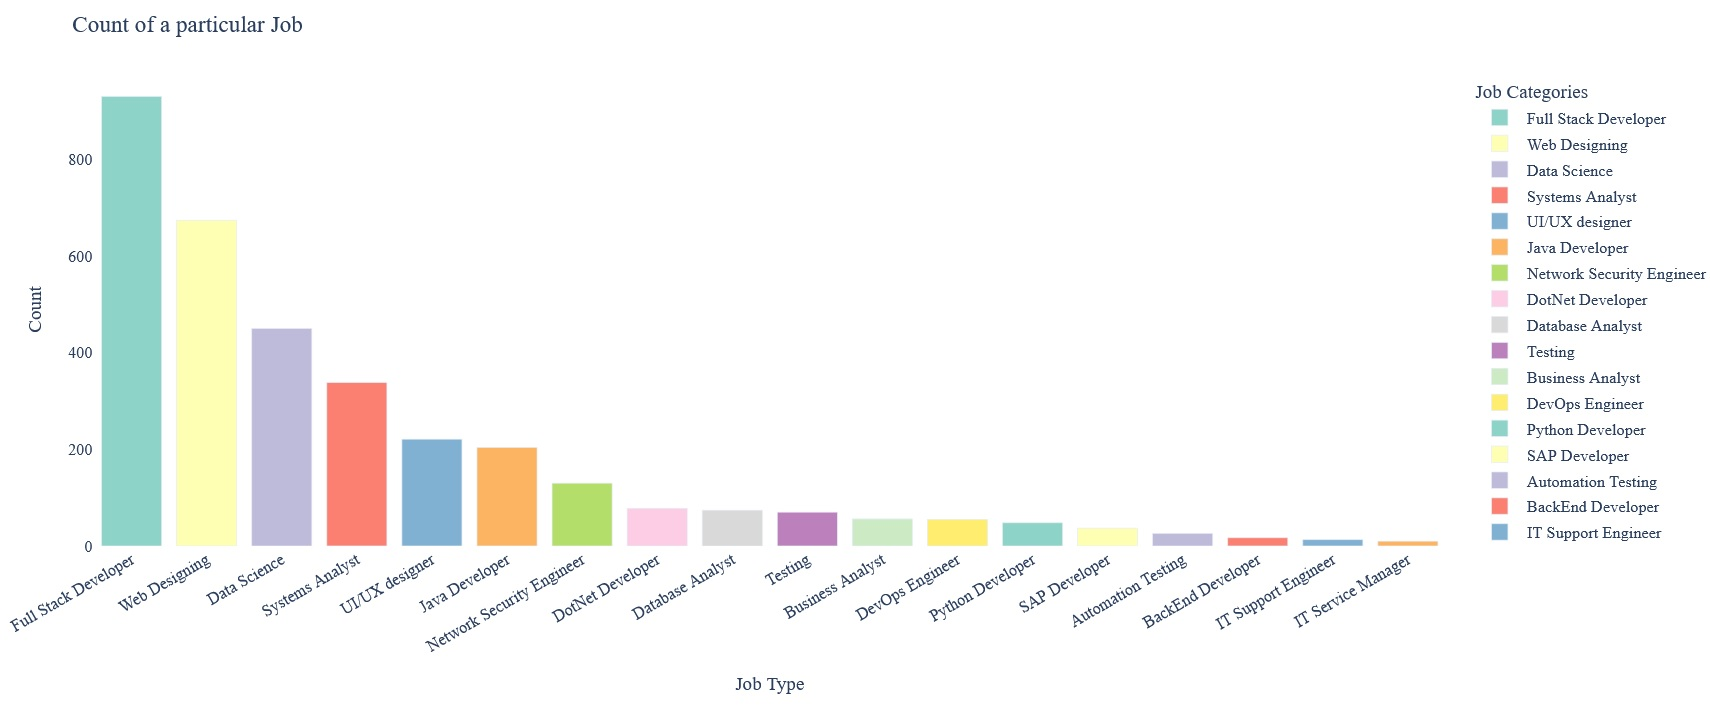

Создаем круговую диаграмму с помощью Plotly Express (px). DataFrame plot_data служит источником данных для круговой диаграммы. Он указывает, что столбец «Count» содержит значения, которые будут использоваться для размера секторов круговой диаграммы, а столбец «Category» содержит названия для каждого сектора.

In [ ]:
fig = px.pie(plot_data, values='Count', names='Category',
             title='Pie plot of Job Category',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hole=0.4,
             labels={'Category': 'Categories', 'Count': 'Count'},
             opacity=0.8,
             )

# Customize the layout
fig.update_layout(
    legend_title='Categories',
    font=dict(family='Times New Roman', size=16, color='black'),
    plot_bgcolor='white',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.show()

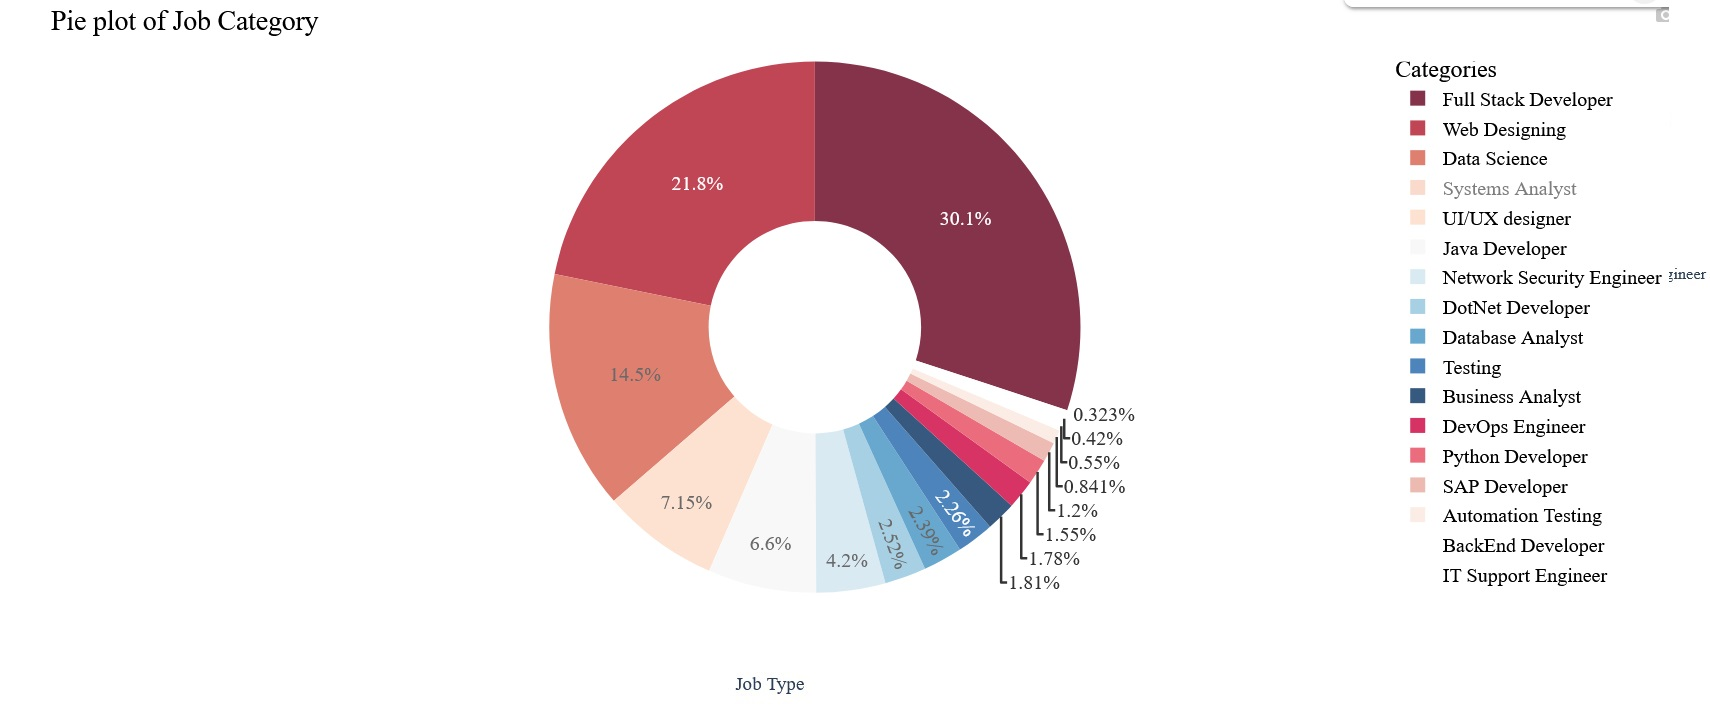

In [12]:
df['Label'].value_counts()

,count
Label,
0,1769
3,891
1,444
4,251
2,56
5,16
6,4


In [13]:
df[df['Label'] == 2]

,Unnamed: 0,Category,Resume,Label
5,5,Data Science,skills c basics iot python matlab data sci...,2
19,19,Data Science,skills c basics iot python matlab data sci...,2
29,29,Data Science,skills c basics iot python matlab data sci...,2
40,40,Data Science,skills c basics iot python matlab data sci...,2
50,50,Data Science,skills c basics iot python matlab data sci...,2
60,60,Data Science,skills c basics iot python matlab data sci...,2
70,70,Data Science,skills c basics iot python matlab data sci...,2
161,161,Data Science,skills c basics iot python matlab data sci...,2
171,171,Data Science,skills c basics iot python matlab data sci...,2
181,181,Data Science,skills c basics iot python matlab data sci...,2


In [ ]:
#Создание столбчатой ​​диаграммы для меток классов
# Создаем новый DataFrame для построения графика.
plot_data = pd.DataFrame({
    'Label': df['Label'].value_counts().index,
    'Count': df['Label'].value_counts().values
})
plot_data.head()
fig = px.bar(plot_data, x='Label', y='Count',
             color='Label',
             labels={'Label': 'Job', 'Count': 'Count'},
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(
    title='Count of a particular Label',
    xaxis_title='Label Type',
    yaxis_title='Count',
    legend_title='Label Categories',
    showlegend=True,
    xaxis=dict(tickangle=-30),
    font=dict(family='Times New Roman', size=12),
    plot_bgcolor='white'
)

fig.show()

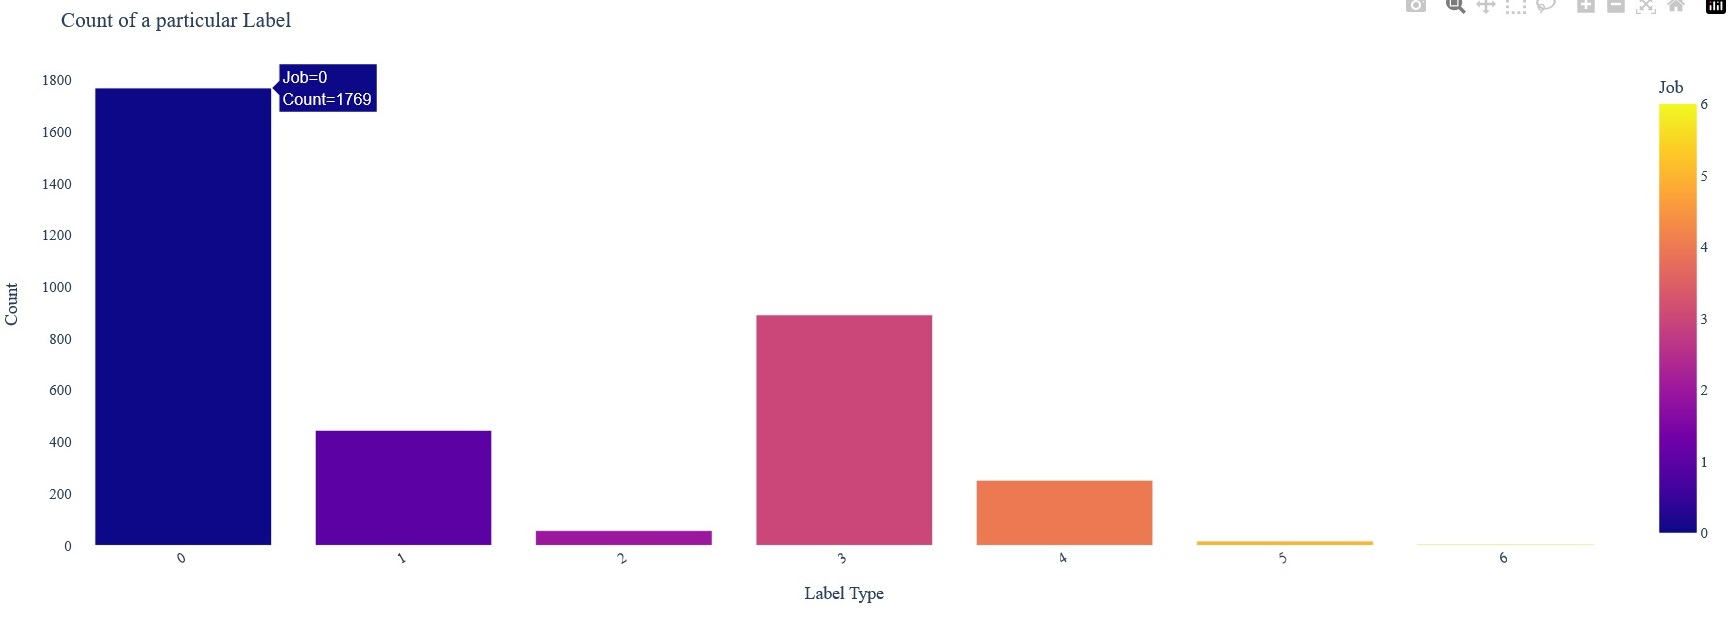

- **Класс 0:** резюме составлено правильно и корректно с точки зрения работодателя, особых замечаний нет.
- **Класс 1:** недостаточно полно указаны технические навыки, опыт и достижения
- **Класс 2:** нет информации (мало информации) о предыдущих местах работы
- **Класс 3:** недостаточно подробно перечислены основные технологии и инструменты, с которыми умеет работать автор резюме
- **Класс 4:** недостаточно информации про образование, в том числе и про дополнительное (онлайн курсы, повышение квалификации, полученные сертификаты и так далее)
- **Класс 5:** резюме недостаточно краткое и лаконичное
- **Класс 6:** нет информации о готовности к постоянному обучению и развитию (саморазвитию), о готовности работать в команде, об аналитических навыках и так далее

##Создаем облако слов

Очищаем данные

1 Удаление (URL, хэштеги, упоминания, специальные буквы, знаки препинания)

2 Токенизация очищенного текста

3 Удаление стоп-слов

4 Выполнение лемматизации окончательного текста

In [15]:
# Preprocessing libraries
import re
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
def resumeKeywords(txt):   # sourcery skip: avoid-builtin-shadow, list-comprehension
    cleanText = re.sub('http\S+\s', ' ', txt) # Removing URLs
    cleanText = re.sub('#\S+\s', ' ', cleanText) # Removing hashtags
    cleanText = re.sub('@\S+', '  ', cleanText)  # Removing mentions
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) # Removing punctuations
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) # Removing non-ASCII characters
    cleanText = re.sub('\s+', ' ', cleanText) # Replace multiple spaces with a single space
    cleanText = cleanText.strip() # Removing leading and trailing whitespaces

    #------------Tokenizing Cleaned Text--------------------------------------------------------
    # Tokenizing our cleaned text
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(cleanText)
    # Now lower everything and storing it in new variable words
    words = []
    for word in tokens:
        words.append(word.lower())
    #--------------------------------------------------------------------------------------------

    #-------------Removing Stop Words------------------------------------------------------------
    stopwords = nltk.corpus.stopwords.words('english')
    words_new = []
    for word in words:
        if word not in stopwords:
            words_new.append(word)
    #--------------------------------------------------------------------------------------------
    #-----------Performing Lemmatization---------------------------------------------------------
    wn = WordNetLemmatizer()
    lemm_text = [wn.lemmatize(word) for word in words_new]
    #--------------------------------------------------------------------------------------------
    #----------Converting List into String-------------------------------------------------------
    processed_text = ' '.join(lemm_text)

    return processed_text

Тестирование функции для удаления определенных данных из резюме

In [17]:
resumeKeywords(" https://www.github.com Software Engineer with 2 years of experience in Data Structures and Algorithms Agile Scrum, SDLC, C++, Java MVC, JavaScript, Web Development, Python " +
               "Data Science, Machine Learning / AI, and Mainframe technologies Programming Languages: 	C/C++, Java, Python, SQL, JCL, Cobol, DB2" +
               "Frameworks: %#####	Java Spring, Spring boot, React, Angular, NodeJs" +
               "Tools: 	GIT, Visual Studio Code, Sublime, Spyder, Jupyter Notebook, Bluezone, Netbeans, Jira, Confluence, Kanban, CI/CD (Jenkins, GitLab, Azure-Devops), AWS," +
               "Data-Bricks Libraries: 	NumPy, Pandas, Matplotlib, nltk, Scikit learn, TensorFlow, Keras Other: 	Problem-Solving, Quick Learner, Time-Management")

'software engineer 2 year experience data structure algorithm agile scrum sdlc c java mvc javascript web development python data science machine learning ai mainframe technology programming language c c java python sql jcl cobol db2frameworks java spring spring boot react angular nodejstools git visual studio code sublime spyder jupyter notebook bluezone netbeans jira confluence kanban ci cd jenkins gitlab azure devops aws data brick library numpy panda matplotlib nltk scikit learn tensorflow kera problem solving quick learner time management'

Применяем созданную выше функцию для обработки данных и создаем новый столбец «Processed_Resume»

In [18]:
df['Processed_Resume'] = df['Resume'].apply(lambda x: resumeKeywords(x))
df.head()

,Unnamed: 0,Category,Resume,Label,Processed_Resume
0,0,Data Science,skills programming languages python pandas...,1,skill programming language python panda numpy ...
1,1,Data Science,education details may to may b e uit r...,1,education detail may may b e uit rgpv data sci...
2,2,Data Science,areas of interest deep learning control syste...,1,area interest deep learning control system des...
3,3,Data Science,skills â r â python â sap hana â table...,1,skill r python sap hana tableau sap hana sql s...
4,4,Data Science,education details mca ymcaust faridabad...,1,education detail mca ymcaust faridabad haryana...


Создаем облако слов из очищенного текста

In [19]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
# Join the cleaned text into a single string
text = ' '.join(df['Resume'])

# Create a word cloud
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=600,
                      max_words=100,
                      colormap='viridis'
                      ).generate(text)

# Convert word cloud to an image
wordcloud_image = wordcloud.to_image()

# Display the word cloud using Plotly as an image
fig = px.imshow(wordcloud_image)
fig.update_layout(
    title='Word Cloud of Cleaned Text',
    xaxis_showticklabels=False,
    yaxis_showticklabels=False,
    plot_bgcolor='white'
)
fig.show()

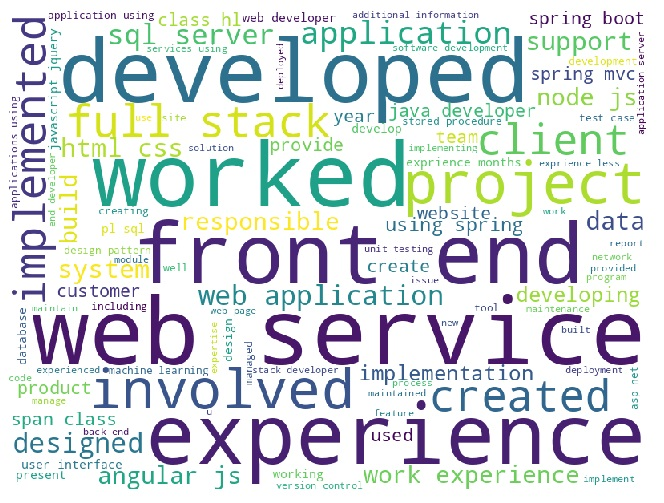